In [99]:
#%matplotlib notebook

In [100]:
import os 
import json 
import tweepy 
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from config import (consumer_key, consumer_secret, 
                    access_token, access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
import time

In [101]:
# Target Search Term
news_org = ["@BBC", "@CBS", "@CNN", "@Fox", "@nytimes"]
counter = 1
sentiments =[]

In [102]:
for org in news_org:
    public_tweets = api.user_timeline(org, count=100)
    tweetnumber = 1       
    for tweet in public_tweets:
        print("Tweet %s: %s" % (counter, tweet["text"]))
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = tweetnumber
        sentiments.append({"Media Source": org,
                           "Text":tweet["text"],
                           "Date": tweet["created_at"],
                           "Compound": compound,
                           "Positive": pos,
                           "Neutral": neu,
                           "Negative": neg,
                           "Tweet Count": tweetnumber})
        tweetnumber +=1
        counter +=1

Tweet 1: Tonight, @reginalddhunter takes a 2,000-mile musical road trip along the US-Mexico border. 🎶

Reginald D Hunter's S… https://t.co/K4ZHogg1lO
Tweet 2: There's a clear difference in the way boys and girls behave during a #heatwave. 😂☀️🌡 @JackWhitehall… https://t.co/SmGTMhnZ3M
Tweet 3: 🎾 Angelique Kerber beat seven-time champion Serena Williams to win her first #Wimbledon title.… https://t.co/O7Q0shxwSc
Tweet 4: RT @BBCSport: Angelique Kerber is the #wimbledon champion! 👏

The German beats Serena Williams to lift the trophy for the first time! 🙌
 
L…
Tweet 5: "We'll definitely keep in touch!"  👋 *Immediately blocks number* #Extras 

https://t.co/9gVnLDsdq0
Tweet 6: A wild banana that may hold the key to protecting the world's edible banana crop has been put on the extinction lis… https://t.co/iU8sxtarEw
Tweet 7: There she goes! 🚢 🌊

The RRS Sir David Attenborough - the UK's polar ship known to some as Boaty McBoatface - is la… https://t.co/bYll3hTWpa
Tweet 8: RT @bbctennis: Megha

Tweet 101: Stand up. Speak up. Blow the whistle. 

Don't miss the premiere of the @TrueCrimeCBS series #Whistleblower tonight… https://t.co/uNhx4Codc2
Tweet 102: RT @TheNeighborhood: There's a new family on the block, and they're about to turn this neighborhood upside down. @CedEntertainer and @Tichi…
Tweet 103: Take a walk down @YandR_CBS memory lane with stars @JessWaltonYR and Peter Bergman! You can watch full episodes of… https://t.co/MZEUfiJJyb
Tweet 104: RT @TKOCBS: Prepare to have some major FUN. #TKO starts NOW! https://t.co/i2ftL6GCj5
Tweet 105: It’s fun, different, unique, and finally here! @TKOCBS hosted by @KevinHart4real premieres at 9/8c on CBS and… https://t.co/MCeVLVK85i
Tweet 106: RT @MagnumPICBS: Talk about hands-on research! #MagnumPI's cast had the honor of joining the US Navy Submarine Force, US Pacific Fleet #Sub…
Tweet 107: Time to mark your calendars! CBS' fall 2018 premiere lineup has been announced: https://t.co/yYv3H9aEO7 https://t.co/lRxAA7suie
Tweet 108: RT

Tweet 201: What do you remember about the time of 9/11? See how George W. Bush harnessed the mood of the nation in #2000sCNN t… https://t.co/j2lYKLwaKQ
Tweet 202: NY Gov. Andrew Cuomo calls the Trump administration's spending to detain immigrant children "shocking and irrespons… https://t.co/l8Y8t1VLwo
Tweet 203: From the Supreme Court to Russian indictments, relive this week in politics https://t.co/fFYGdL1CJW https://t.co/rCRbcCSdDx
Tweet 204: Police departments across the country participate in the latest lip sync challenge https://t.co/R91Sp68qJU https://t.co/etNx934TMu
Tweet 205: It used to be mindless entertainment. Now, reality television is a dominant force in American politics. How did tha… https://t.co/inyX7hocjS
Tweet 206: Gay men, adulterers publicly flogged in Indonesia https://t.co/7iV8SqScm7 https://t.co/y2ApR0iSoR
Tweet 207: Man posing as rideshare driver accused of serial rape in San Francisco https://t.co/a5ZsgQyyBB https://t.co/VshWiUq3cu
Tweet 208: Haiti's Prime Min

Tweet 295: Republicans praise ex-FBI lawyer Lisa Page's testimony one day after the heated Peter Strzok hearing… https://t.co/9CWHzrApH9
Tweet 296: RT @OutFrontCNN: "It's as if your neighbor came over, robbed your house, burned it down, and then next day you go have a meal with him at t…
Tweet 297: RT @AC360: Journalist @carlbernstein on Russian indictments: "This was an act of war by the Russians. An act of cyber warfare to undermine…
Tweet 298: Former CIA Director Michael Hayden said he anticipates many more indictments -- including those of Americans -- to… https://t.co/eO4QMTijWa
Tweet 299: RT @AC360: Former Hillary Clinton campaign manager @RobbyMook on the indictment of 12 Russians for the DNC hacking: “It’s disturbing that t…
Tweet 300: RT @OutFrontCNN: "I find the release of this indictment today as very selective, and I think it's somewhat inappropriate considering that t…
Tweet 301: More Boston snaps. https://t.co/NCcWPSV8yX
Tweet 302: RT @helpscout: Said it once, we'll keep 

Tweet 401: Retail is an incredibly gender-delineated space. So what does a "gender-free" store look like?https://t.co/g9ALur4LC2
Tweet 402: Why is there a life-size replica of a Harlem block in a Swedish forest? A photographer visited Potemkin villages ar… https://t.co/P4CvDG6PKT
Tweet 403: Death Toll in Pakistan Suicide Bombing Rises to 128 https://t.co/t1RikLuffZ
Tweet 404: Influential judge, conservative warrior, Washington insider: beyond the carefully shaped narrative of President Tru… https://t.co/yDJ4JDSFsa
Tweet 405: This has been the Google Translate World Cup https://t.co/dZ3jxtttNI
Tweet 406: Haiti’s Prime Minister Quits Amid Protests Over Fuel Plan https://t.co/PiUs4sW92S
Tweet 407: Our 52 Places traveler shares what she uses to make photos and videos, charge devices and organize all those travel… https://t.co/yYEy9F6nEi
Tweet 408: The Ethicist: Should I Tell My Siblings About Mom’s Affair? https://t.co/piKcRXriDO
Tweet 409: Don’t be surprised if a TSA agent asks you to rem

In [103]:
sentiments_df=pd.DataFrame.from_dict(sentiments)#check
# sentiments_df["User"].describe()
sentiments_df.head()

,Compound,Date,Media Source,Negative,Neutral,Positive,Text,Tweet Count
0,0.0000,Sat Jul 14 19:03:07 +0000 2018,@BBC,0.000,1.000,0.000,"Tonight, @reginalddhunter takes a 2,000-mile m...",1
1,0.3818,Sat Jul 14 18:03:04 +0000 2018,@BBC,0.000,0.843,0.157,There's a clear difference in the way boys and...,2
2,0.8271,Sat Jul 14 17:32:50 +0000 2018,@BBC,0.000,0.609,0.391,🎾 Angelique Kerber beat seven-time champion Se...,3
3,0.6688,Sat Jul 14 16:23:10 +0000 2018,@BBC,0.000,0.824,0.176,RT @BBCSport: Angelique Kerber is the #wimbled...,4
4,0.2714,Sat Jul 14 16:03:05 +0000 2018,@BBC,0.147,0.621,0.232,"""We'll definitely keep in touch!"" 👋 *Immediat...",5


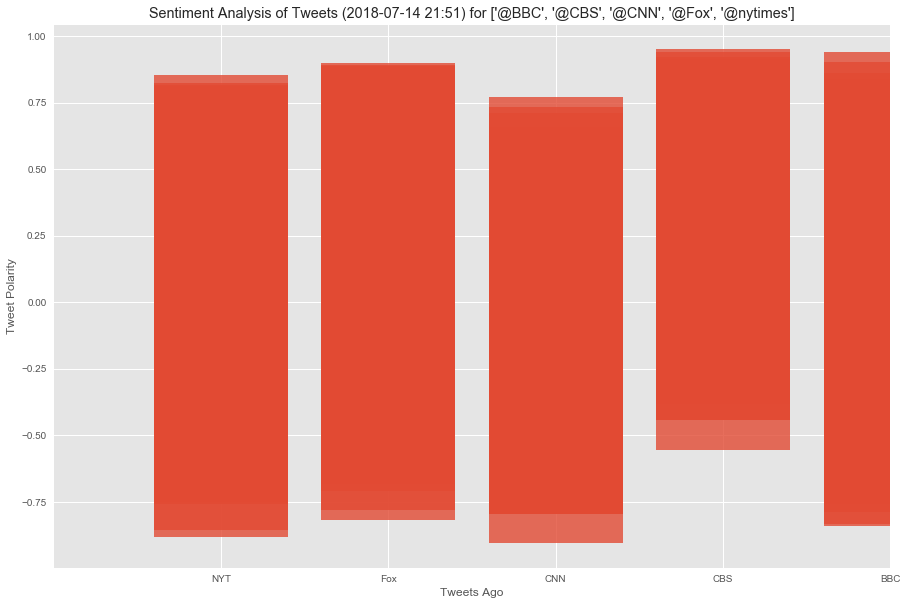

In [105]:
plt.figure(figsize = (15,10))
x_vals = sentiments_df["Media Source"]
y_vals = sentiments_df["Compound"]
plt.bar(x_vals,
         y_vals,alpha=0.8)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for {news_org}")
plt.xlim([x_vals.max(),x_vals.min()]) 
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
x_locations = [value for value in np.arange(6)]
plt.xticks(x_locations, x_labels)
plt.show()

In [106]:
#check
sentiments_df.describe()

,Compound,Negative,Neutral,Positive,Tweet Count
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.128973,0.056468,0.821730,0.121822,50.500000
std,0.429346,0.102115,0.173115,0.157486,28.894979
min,-0.904200,0.000000,0.147000,0.000000,1.000000
25%,0.000000,0.000000,0.733000,0.000000,25.750000
50%,0.000000,0.000000,0.848500,0.072000,50.500000
75%,0.480675,0.103000,1.000000,0.190750,75.250000
max,0.952300,0.815000,1.000000,0.742000,100.000000


In [113]:
sentiments_csv= sentiments_df[['Media Source','Date','Text','Compound','Positive','Neutral','Negative','Tweet Count']]
sentiments_csv.head()

,Media Source,Date,Text,Compound,Positive,Neutral,Negative,Tweet Count
0,@BBC,Sat Jul 14 19:03:07 +0000 2018,"Tonight, @reginalddhunter takes a 2,000-mile m...",0.0000,0.000,1.000,0.000,1
1,@BBC,Sat Jul 14 18:03:04 +0000 2018,There's a clear difference in the way boys and...,0.3818,0.157,0.843,0.000,2
2,@BBC,Sat Jul 14 17:32:50 +0000 2018,🎾 Angelique Kerber beat seven-time champion Se...,0.8271,0.391,0.609,0.000,3
3,@BBC,Sat Jul 14 16:23:10 +0000 2018,RT @BBCSport: Angelique Kerber is the #wimbled...,0.6688,0.176,0.824,0.000,4
4,@BBC,Sat Jul 14 16:03:05 +0000 2018,"""We'll definitely keep in touch!"" 👋 *Immediat...",0.2714,0.232,0.621,0.147,5


In [109]:
sentiments_csv.to_csv("News Mood Tweets.csv")

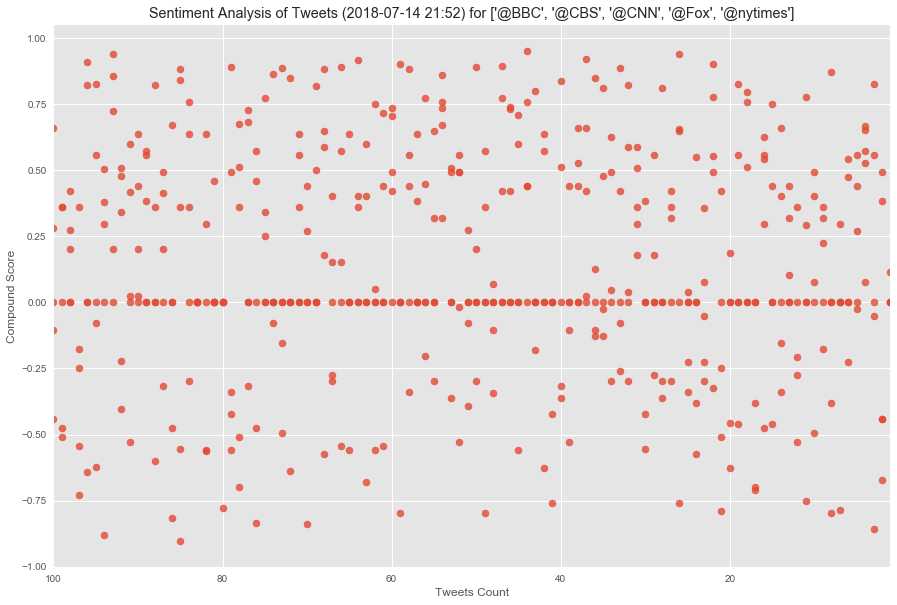

In [110]:
# Create plot
plt.figure(figsize = (15,10))
x_vals = sentiments_df["Tweet Count"]
y_vals = sentiments_df["Compound"]
plt.scatter(x_vals,
         y_vals, marker="o", linewidth=0.5,
         alpha=0.8)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for {news_org}")
plt.xlim([x_vals.max(),x_vals.min()]) 
plt.ylabel("Compound Score")
plt.xlabel("Tweets Count")
plt.show()

In [ ]:
#written description of three observable trends based on the data
#1. The tweet by the airlines had a nuetral score 
#2. Average tweet by the airline is slightly above 50 tweets 
#3. The distribution of tweets is normal